## Query a pdf document - Citi 2023 Q1 results

to run this notebook, you need to set the "OPENAI_API_KEY" environment variable on your pc

In [32]:
from doc_query_utils import create_embeddings, ask_question

In [33]:
# name of the pdf document to be analysed plus configuration settings 
cfg = {
    'PDF_DOC': '2023_Q1.pdf', # this is the name of the pdf file to query
    'TEXT_PARTITION_SIZE': 500, # number of characters per text partition
    'OVERLAP_PCT': 0.5, # defines how much partitions will overlap each other
    'DATA_FOLDER': 'data',
    # OPEN AI models
    'EMBEDDING_MODEL': 'text-embedding-ada-002',
    'GPT_MODEL': 'gpt-3.5-turbo',
    'EMBEDDING_ENCODING': 'cl100k_base'  # this the encoding for text-embedding-ada-002
}

The original pdf has been broken down into sections.
Each section has been converted into a vector (a.k.a. "embedding")
The question is also converted into an embedding vector.
We then apply cosine similarity to "extract" the sections of the document that are most relevant to the question and include them in the prompt for the GPT model.

In [34]:
# Create (or load previously saved) document embeddings.
emb = create_embeddings(cfg, load_saved=True)

data\emb_2023_Q1.pkl
Loaded 249 embeddings, each of size 1,536


In [35]:
question1 = 'What was the first quarter 2023 revenue?'

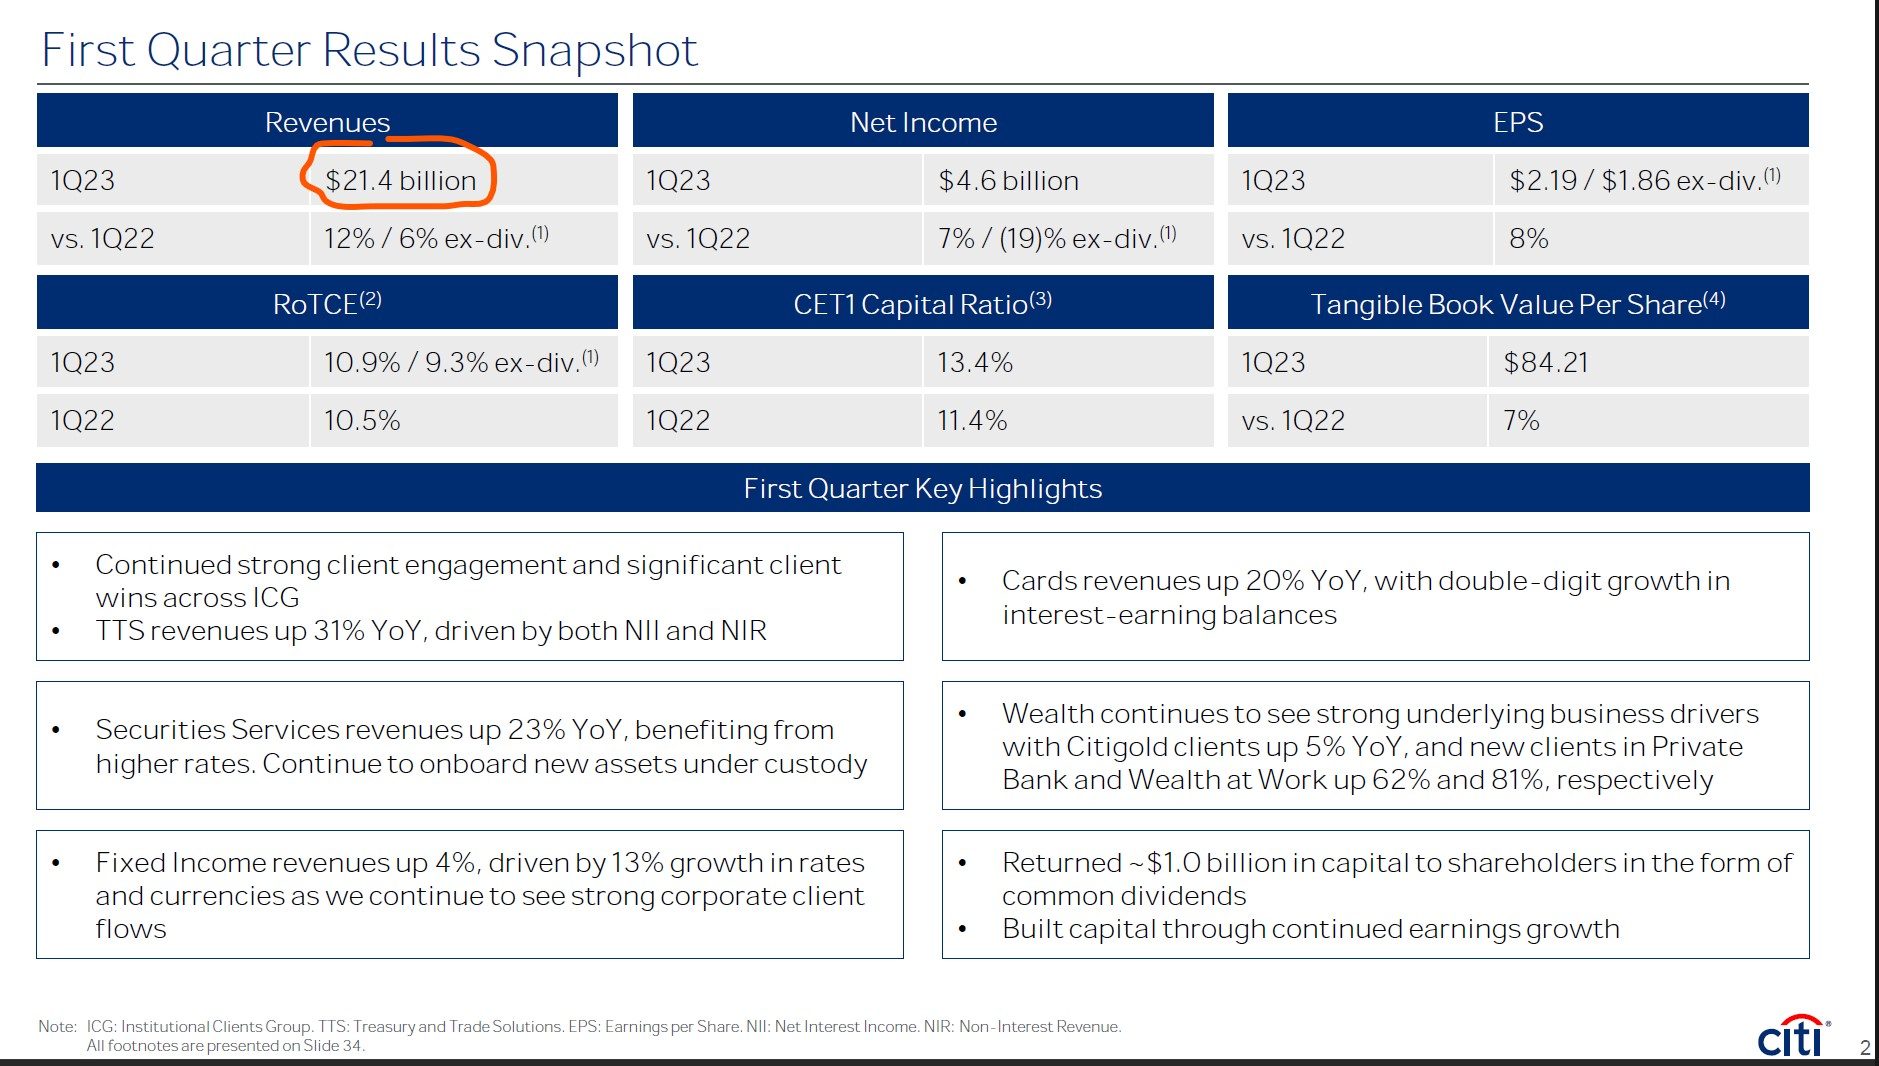

To confirm the answers are obtained from the document as opposed to the generic GPT training, let us exclude the document-specific embeddings from the prompt

In [36]:
answer, info = ask_question(question1, emb, cfg, doc_specific=False, sim_threshold=0.8)

Answer: I'm sorry, but as an AI language model, I do not have access to real-time financial data. Please provide more context or specify the company you are referring to.


As expected, the question could not be answered.
Now let us ask the same question again but this time including the document-specific embedding information:

In [37]:
answer, info = ask_question(question1, emb, cfg, doc_specific=True, sim_threshold=0.8)

Answer: The first quarter 2023 revenue was $21.4 billion.


We now got the correct answer.

In [38]:
question2 = 'What was the annual tax rate?'

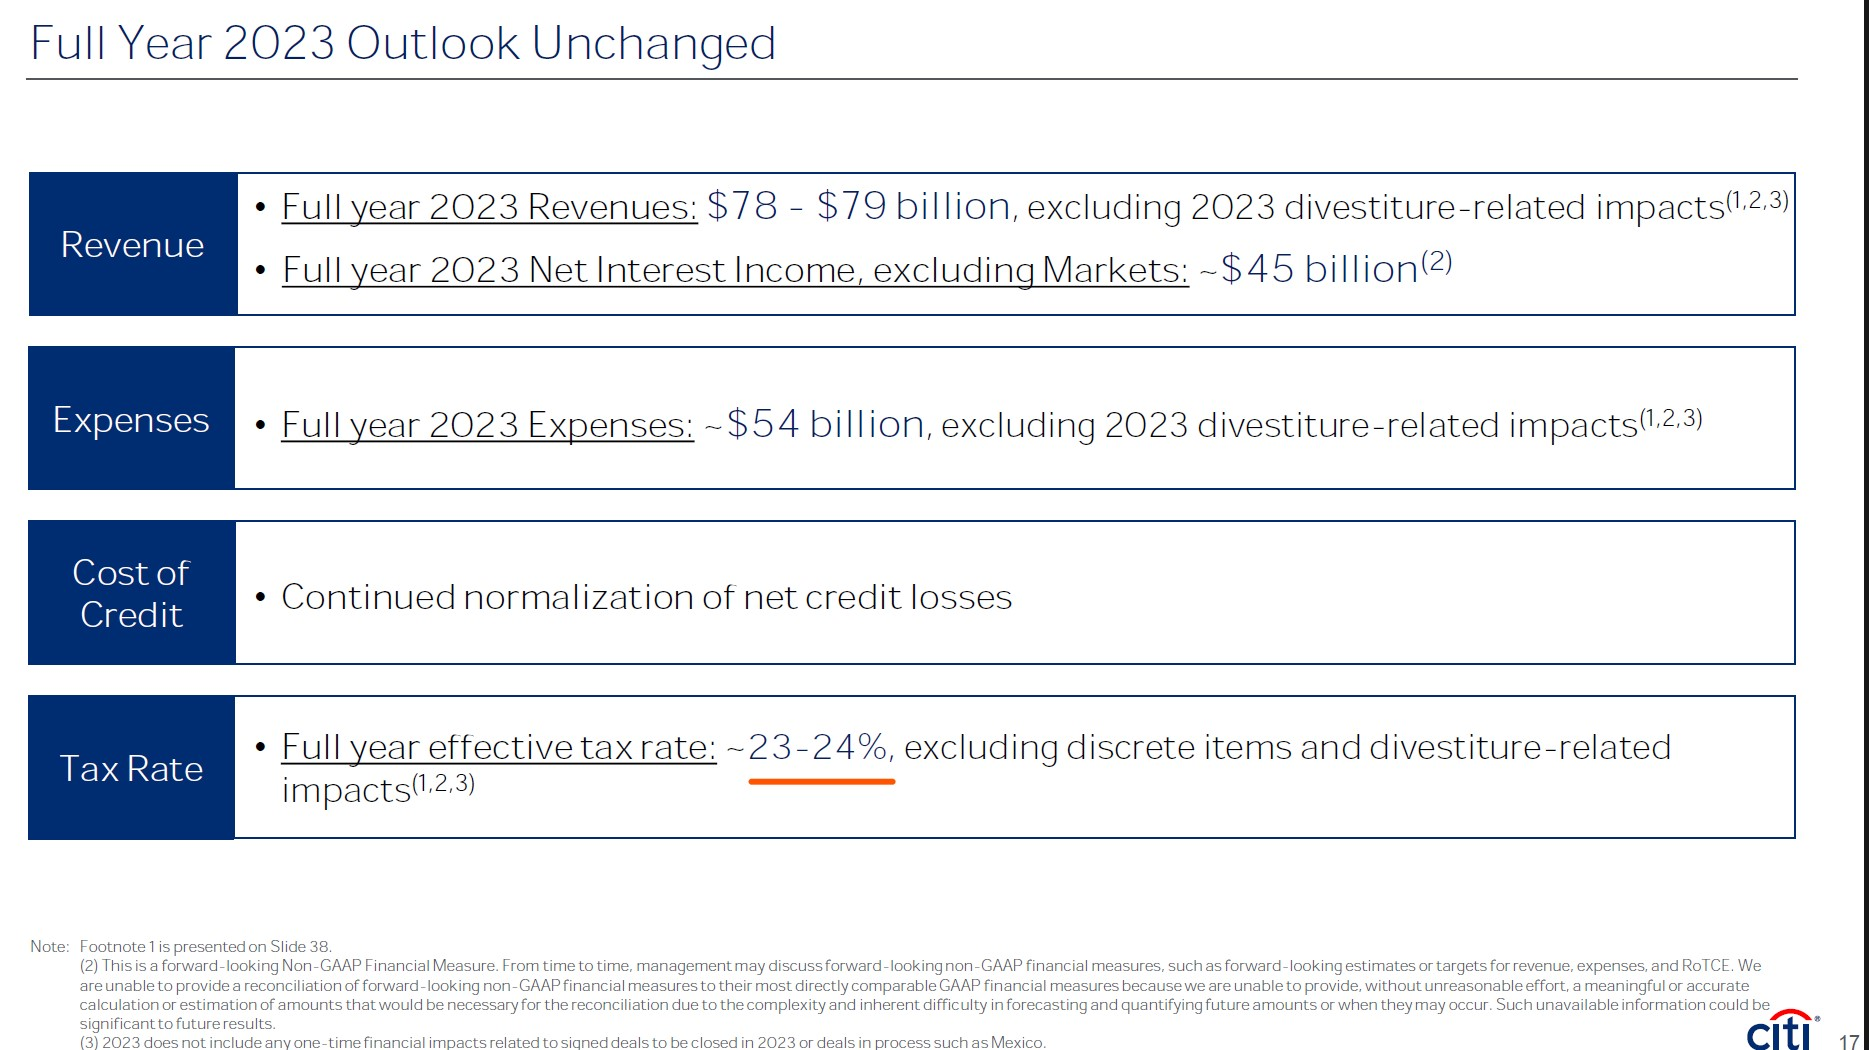

In [39]:
answer, info = ask_question(question2, emb, cfg, doc_specific=True, sim_threshold=0.77)

Answer: The full year effective tax rate for 2023 is estimated to be around 23-24%, excluding discrete items and divestiture-related impacts.
